

#Linear Regression



In [1]:
#importing pandas, numpy and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Loading a csv file
linear_train = pd.read_csv('/content/drive/MyDrive/linear_train.csv')
print(linear_train.shape)

#creating a 2D array
x_train=np.zeros((50000,22))

#importing values from linear train to the array x_train
x_train = linear_train.loc[:,:]

(50000, 22)


In [3]:
#creating array
x_train=np.array(x_train)
y_test= np.array(x_train[:,21])

#deleting 1st and last column of x_train
x_train=np.delete(x_train,0,axis=1)
x_train=np.delete(x_train,20,axis=1)

In [4]:
#This normalise X
def normalise(x):
  mean=np.mean(x,axis=0)
  std=np.std(x,axis=0)
  x_n=(x-mean)/std
  return x_n
  
x_train=normalise(x_train)
print(x_train.shape)

(50000, 20)


In [5]:
y_test=y_test.reshape(50000,1)
print(y_test)

#To bring the value of y in between 0 and 1
y_test=(y_test-np.min(y_test))/(np.max(y_test)-np.min(y_test)) 

[[-218.01623149]
 [ 154.14084898]
 [ 394.84970115]
 ...
 [  -3.44448897]
 [ 445.35678148]
 [-500.9246807 ]]


In [6]:
w=np.zeros((20,1))
b=1
#Find  value of the Funtion f= w1x1 + w2x2 + w3x3 +...... +b
def predict(x,w,b):
  f_wb= np.dot(x,w) + b
  return f_wb

y_predict=predict(x_train,w,b)
print(y_predict.shape)

(50000, 1)


In [8]:
'''to compute cost by the formula summation(f(x)-y)**2 and 
then divided my 2*no of different sets of data'''

def cost(x,y,w,b):
  f=predict(x,w,b)
  m=x.shape[0]
  cost=(f-y)**2
  cost=cost/(2*m)
  cost=np.sum(cost)
  return cost
  
#Let's see the cost 
cost(x_train,y_test,w,b)   

0.14531437272079512

In [9]:
#to calculate rms error function
def Rms(predictions, targets):
      return np.sqrt(((predictions - targets) ** 2).mean())

In [10]:
#This calculates dJ/dw and dJ/db and returns that 
def gradient(x,y,w,b):
  dj_dw=np.zeros((20,1))
  dj_db=0
  m=x.shape[0]
  f= predict(x,w,b)
  dj_db=np.sum(f-y)/m
  dj_dw=np.dot(x.T,f-y)/m
  return dj_dw, dj_db 

gradient(x_train,y_test,w,b)

(array([[-0.03494538],
        [-0.03252595],
        [-0.04711588],
        [-0.00052049],
        [-0.00840974],
        [-0.01227667],
        [-0.03549587],
        [-0.01527336],
        [-0.01003366],
        [-0.04548918],
        [-0.01994824],
        [-0.01848977],
        [-0.00190956],
        [-0.03973803],
        [-0.03973803],
        [-0.0230226 ],
        [-0.0111537 ],
        [-0.01632685],
        [-0.0158784 ],
        [-0.02039402]]),
 0.5253541226089755)

cost after 1000 iterations 0.0037664720298949067
cost after 2000 iterations 0.0011972507211795592
cost after 3000 iterations 0.0011503578650238085
cost after 4000 iterations 0.0011495017207151098
cost after 5000 iterations 0.001149486086170729
cost after 6000 iterations 0.0011494858005921614
cost after 7000 iterations 0.0011494857953745234
cost after 8000 iterations 0.0011494857952791698
cost after 9000 iterations 0.0011494857952774266
cost after 10000 iterations 0.0011494857952773947
final w [[0.03583506]
 [0.03252242]
 [0.04783565]
 [0.00084328]
 [0.00852387]
 [0.01218252]
 [0.03496925]
 [0.01521609]
 [0.00999028]
 [0.04602257]
 [0.01932663]
 [0.018289  ]
 [0.00138822]
 [0.01998066]
 [0.01998066]
 [0.02262475]
 [0.0105623 ]
 [0.01661543]
 [0.01653609]
 [0.01926708]]
final b 0.47464587845239004


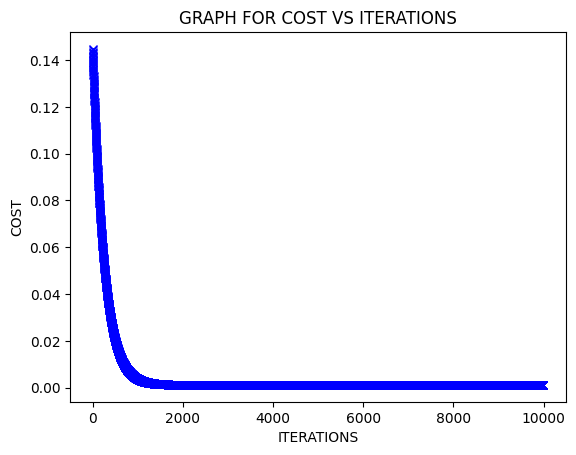

In [11]:
'''This uses the partial derivative and change w and b. 
In each steps to calculate cost and after complitions display the graph.
Also it gives the final w and b'''  

def gradient_descent(x,y,w,b,alpha):
  for i in range(iterations):
    dj_dw_f, dj_db_f= gradient(x,y,w,b)
    w= w - alpha*dj_dw_f
    b= b - alpha*dj_db_f
    if (i+1)%1000==0:
      print("cost after",i+1,"iterations",cost(x,y,w,b))
    h=cost(x,y,w,b)
    plt.plot(i,h,c='b',marker='x')
    plt.title("GRAPH FOR COST VS ITERATIONS")
    plt.xlabel("ITERATIONS")
    plt.ylabel("COST")
  return w,b

iterations=10000
alpha=0.002
w,b = gradient_descent(x_train,y_test,w,b,alpha)
print("final w",w)
print("final b",b)


In [12]:
y_predict=predict(x_train,w,b)
print("RMS error is : ", Rms(y_predict,y_test))

RMS error is :  0.047947592124681186
